# Neural Network Implementation using NumPy
In this guide, we'll walk through building a neural network from scratch using NumPy, trained on the MNIST dataset. We will preprocess the data using Pandas, and then construct and train the neural network using NumPy. The MNIST dataset is a collection of 28x28 grayscale images of handwritten digits (0-9).

## Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

## Load the required Dataset
Load the MNIST dataset and preprocess it. The training dataset contains labels in the first column, while the test dataset does not. The rest columns represent each pixel, thus each row represents an image.

In [3]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(f"Shape of Train Dataset: {train_data.shape}")

Shape of Train Dataset: (42000, 785)


**Train Dataset**

In [4]:
train_data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

**Features and Label**

Split the training dataset into features and label set. To make the calculations easy, normalize the dataset by dividing the values by 255. This ensures that the values are in the range 0 to 1.

In [5]:
# Shuffle the rows of the dataset
shuffled_train_data = train_data.sample(frac=1, random_state=42)

# Separate features (X) and labels (y)
X = shuffled_train_data.drop('label', axis=1)
y = shuffled_train_data['label']

# Split the dataset into training and testing sets
train_size = int(0.9 * len(train_data))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"Shape of Training: X -> {X_train.shape}, y -> {y_train.shape}")
print(f"Shape of Test: X -> {X_test.shape}, y-> {y_test.shape}")

Shape of Training: X -> (37800, 784), y -> (37800,)
Shape of Test: X -> (4200, 784), y-> (4200,)


In [6]:
X_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9867,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27923,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35503,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train.head(5)

5457     8
38509    1
25536    9
31803    9
39863    8
Name: label, dtype: int64

In [9]:
y_test.head(5)

9867     7
27923    8
41720    2
35503    5
21372    2
Name: label, dtype: int64

In [10]:
# Ensure the data is in numpy array format
X_train, X_test = np.array(X_train), np.array(X_test)
y_train, y_test = np.array(y_train), np.array(y_test)

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0
print(f"Shape of X_train: {X_train.shape} and X_test: {X_test.shape}")

Shape of X_train: (37800, 784) and X_test: (4200, 784)


**One-Hot Encoding**

It is a process that transforms categorical labels into a format that can be provided to machine learning algorithms to do a better job in prediction. For the MNIST dataset, where we have labels for digits 0 through 9, one-hot encoding will convert each label into a binary vector of length 10. Each position in the vector corresponds to one of the digits, with a 1 indicating the presence of the digit and 0s everywhere else.

Steps:
1. We first create an array of zeros with the shape (number of samples, number of classes). For the MNIST dataset, we have 42,000 samples and 10 classes (digits 0-9).
  - `y_train_one_hot = np.zeros((y_train.size, y_train.max() + 1))`
  - `y_train.size` gives the number of samples (42,000). <br>
  - `y_train.max() + 1` gives the number of classes (10). We add 1 because y_train.max() gives the highest label, which is 9, and we need a total of 10 classes (0-9).
2. We use NumPy's advanced indexing to set the appropriate positions to 1. For each sample, we set the column corresponding to its label to 1. <br>
  - `y_train_one_hot[np.arange(y_train.size), y_train] = 1` <br>
  - `np.arange(y_train.size)` generates an array of indices from 0 to 41,999 (42,000 samples).
  - `y_train` is the array of labels, where each element is a digit between 0 and 9.
  - `np.arange(y_train.size), y_train` is used to index into the y_train_one_hot array. This line sets the appropriate column for each row to 1.
`

In [11]:
# One-hot encode the labels for training set
rows_train = y_train.size
cols_train = y_train.max()
y_train_one_hot = np.zeros((rows_train, cols_train + 1))
y_train_one_hot[np.arange(rows_train), y_train] = 1

# One-hot encode the labels for test set
rows_test = y_test.size
cols_test = y_test.max()
y_test_one_hot = np.zeros((rows_test, cols_test + 1))
y_test_one_hot[np.arange(rows_test), y_test] = 1

In [12]:
print(f"{y_train_one_hot.shape}")
print(f"{y_test_one_hot.shape}")

(37800, 10)
(4200, 10)


# Initialize Neural Networks

In this step, we define the structure of our neural network and initialize the weights and biases for the layers. Let’s break this down in great detail.

**Weight Initialization**

Weights are the parameters that the neural network learns during training. We need to initialize them with small random values.

- np.random.seed(42): Sets the random seed for reproducibility, ensuring the same random values are generated each time we run the code.
- np.random.randn(input_size, hidden_size) * 0.01: Generates a matrix of random values from a standard normal distribution (mean = 0, standard deviation = 1). Multiplying by 0.01 scales these values down to be smaller, which helps with the convergence of the training process.
- W1 is the weight matrix for the connections between the input layer and the hidden layer. Its shape is (784, 64).
- W2 is the weight matrix for the connections between the hidden layer and the output layer. Its shape is (64, 10).

**Why Bias is a Matrix with Only 1 Row**

Biases are typically vectors (or 1D arrays) with one bias value per neuron in the layer they are associated with. In our code, they are initialized as matrices with one row to facilitate matrix operations during the forward and backward propagation steps.

**Matrix Shapes:**

- Weights (W1 and W2):

  W1 has a shape of (784, 64), meaning each of the 784 input features has 64 weights connecting it to the 64 neurons in the hidden layer.
  W2 has a shape of (64, 10), meaning each of the 64 hidden neurons has 10 weights connecting it to the 10 output neurons.

**Biases (b1 and b2):**

- b1 has a shape of (1, 64), meaning there is one bias value for each of the 64 neurons in the hidden layer.
- b2 has a shape of (1, 10), meaning there is one bias value for each of the 10 output neurons.

By having biases as 2D arrays with one row, it makes it easier to add them to the weighted sums during forward propagation using broadcasting in NumPy.

In [13]:
# Define the neural network structure
input_size = 784  # 28x28 pixels flattened
hidden_size = 64  # Number of hidden neurons
output_size = 10  # Number of classes (digits 0-9)

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of W1: {W1.shape}, b1: {b1.shape}")
print(f"Shape of W2: {W2.shape}, b2: {b2.shape}")

Shape of X_train: (37800, 784)
Shape of y_train: (37800,)
Shape of X_test: (4200, 784)
Shape of y_test: (4200,)
Shape of W1: (784, 64), b1: (1, 64)
Shape of W2: (64, 10), b2: (1, 10)


# Define Activation Functions

In [14]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return expZ / np.sum(expZ, axis=1, keepdims=True)

## Step 5: Forward Propagation

Forward propagation is the process of calculating the output of the neural network by passing the input data through each layer. Here’s a detailed breakdown of each step involved.

### What Happens During Forward Propagation?

1. Calculate the input to the hidden layer neurons (Z1)
2. Apply the activation function to compute the hidden layer activations (A1)
3. Calculate the input to the output layer neurons (Z2)
4. Apply the softmax activation function to compute the output layer activations (A2)

### Detailed Explanation

#### Weight Matrix Shapes and Connections

**Weights Matrix:**

- The weight matrix $(W1)$ connects the input layer to the hidden layer.
  - Each neuron in the hidden layer receives input from every neuron in the input layer.
  - Hence, if the input layer has 784 neurons (features) and the hidden layer has 64 neurons, $(W1)$ will be of shape $( (784, 64))$.
  - Each element $( W1_{ij})$ represents the weight of the connection from the $( i^{th} )$ input feature to the $( j^{th})$ hidden neuron.

- The weight matrix $(W2)$ connects the hidden layer to the output layer.
  - Each neuron in the output layer receives input from every neuron in the hidden layer.
  - Hence, if the hidden layer has 64 neurons and the output layer has 10 neurons (one for each digit), $(W2)$ will be of shape $( (64, 10))$.
  - Each element $( W2_{ij} )$ represents the weight of the connection from the $( i^{th})$ hidden neuron to the $( j^{th} )$ output neuron.

#### Biases

- The biases $(b1)$ and $(b2)$ are vectors (represented as 1-row matrices here) that add a constant to the activation of each neuron in the hidden and output layers, respectively.
- $(b1)$ has shape $(1, 64)$ and $(b2)$ has shape $(1, 10)$.

### Step-by-Step Process

#### 1. Input to Hidden Layer (Z1)

**Matrix Multiplication and Bias Addition:**

```python
Z1 = np.dot(X, W1) + b1
```

- $(X)$ has shape $(number\_of\_samples, 784)$.
- $(W1)$ has shape $(784, 64)$.
- $(b1)$ has shape $(1, 64)$.

**Why these shapes?**

- When you multiply $(X)$ (which has one row per sample and one column per input feature) by $(W1)$ (which has one column per hidden neuron), each sample’s input features are combined linearly to produce the hidden layer inputs.
- Adding $(b1)$ broadcasts the bias term to each of the samples, ensuring each hidden neuron has its bias added to its input.

#### 2. Activation Function for Hidden Layer (A1)

**Apply ReLU Activation:**

```python
A1 = relu(Z1)
```

- The ReLU function applies element-wise, setting all negative values to 0, thereby introducing non-linearity.

#### 3. Hidden Layer to Output Layer (Z2)

**Matrix Multiplication and Bias Addition:**

```python
Z2 = np.dot(A1, W2) + b2
```

- $(A1)$ has shape $(number\_of\_samples, 64)$.
- $(W2)$ has shape $(64, 10)$.
- $(b2)$ has shape $(1, 10)$.

**Why these shapes?**

- When you multiply $(A1)$ (which has one row per sample and one column per hidden neuron) by $(W2)$ (which has one column per output neuron), each hidden neuron’s activations are combined linearly to produce the output layer inputs.
- Adding $(b2)$ broadcasts the bias term to each of the samples, ensuring each output neuron has its bias added to its input.

#### 4. Activation Function for Output Layer (A2)

**Apply Softmax Activation:**

```python
A2 = softmax(Z2)
```

- The softmax function converts the output layer inputs into probabilities, where each value in the output vector represents the probability of the sample belonging to each class.

### Visualization of Weight Matrices

**Visualizing Weight Matrix $(W1)$:**

- Imagine $(W1)$ as a table where:
  - Rows correspond to input features (784 in total).
  - Columns correspond to hidden neurons (64 in total).
- Each entry $(W1_{ij})$ is the weight from the $(i^{th})$ input feature to the $(j^{th})$ hidden neuron.

**Visualizing Weight Matrix $(W2)$:**

- Imagine $(W2)$ as a table where:
  - Rows correspond to hidden neurons (64 in total).
  - Columns correspond to output neurons (10 in total).
- Each entry $(W2_{ij})$ is the weight from the $(i^{th})$ hidden neuron to the $(j^{th})$ output neuron.

### Summary

- **Weight Matrices:** Essential for connecting neurons between layers. Each connection (input feature to hidden neuron, hidden neuron to output neuron) has a unique weight.
- **Bias Vectors:** Provide an additional parameter for each neuron to ensure the neuron has flexibility in its output.
- **Forward Propagation:** Involves matrix multiplication and adding biases to compute neuron inputs, followed by applying activation functions to compute neuron outputs.

By structuring the weights and biases as matrices, we efficiently utilize matrix operations to handle multiple samples in parallel, which is crucial for efficient training and inference in neural networks.

In [15]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


## Define the Loss Function

In [16]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_likelihood = -np.log(y_pred[range(m), y_true.argmax(axis=1)])
    loss = np.sum(log_likelihood) / m
    return loss

## Backward Propagation

Backward propagation, or backpropagation, is the process of computing the gradient of the loss function with respect to each parameter (weights and biases) in the network. This gradient is then used to update the parameters to minimize the loss.

Here’s a detailed breakdown of the backward propagation step.

### Detailed Steps in Backward Propagation

1. **Compute the Loss Gradient with Respect to the Output Layer (dZ2)**
2. **Gradient of the Loss with Respect to Weights and Biases of the Output Layer (dW2, db2)**
3. **Gradient of the Loss with Respect to the Hidden Layer Activations (dA1)**
4. **Gradient of the Loss with Respect to the Hidden Layer Pre-Activations (dZ1)**
5. **Gradient of the Loss with Respect to Weights and Biases of the Hidden Layer (dW1, db1)**
6. **Update the Weights and Biases Using the Gradients**

Let's break each of these steps down in detail:

### 1. Compute the Loss Gradient with Respect to the Output Layer (dZ2)

First, we calculate the gradient of the loss with respect to the output layer activations $(A2)$.

#### Loss Gradient (Cross-Entropy Loss)

For a classification problem with cross-entropy loss, the gradient of the loss with respect to the output activations $( A2 )$ is:

$$
dZ2 = A2 - Y
$$

Here:
- $( A2 )$ is the output from the softmax activation (predicted probabilities), shape $(42000, 10)$.
- $( Y )$ is the one-hot encoded true labels, shape $(42000, 10)$.
- $( dZ2 )$ is the gradient of the loss with respect to $( Z2 )$ (pre-activation output of the output layer), shape $(42000, 10)$.

### 2. Gradient of the Loss with Respect to Weights and Biases of the Output Layer (dW2, db2)

Next, we compute the gradients of the loss with respect to the weights $( W2 )$ and biases $( b2 )$.

#### Weight Gradient (dW2)

$$ dW2 = \frac{1}{m} A1^T \cdot dZ2 $$

- $( A1^T )$ is the transpose of $( A1 )$, shape $(64, 42000)$.
- $( dZ2 )$ is the gradient from the previous step, shape $(42000, 10)$.
- $( dW2 )$ is the gradient of the loss with respect to $( W2 )$, shape $(64, 10)$.
- $( m )$ is the number of samples (42,000).

#### Bias Gradient (db2)

$$ db2 = \frac{1}{m} \sum_{i=1}^m dZ2_i $$

- $( db2 )$ is the gradient of the loss with respect to $( b2 )$, shape $(1, 10)$.
- This is calculated by summing $( dZ2 )$ over all samples and then averaging.

### 3. Gradient of

#### Gradient of the Loss with Respect to Hidden Layer Activations (dA1)

Next, we need to propagate the gradient back to the hidden layer. We start by computing the gradient of the loss with respect to the hidden layer activations $( A1 )$.

$$ dA1 = dZ2 \cdot W2^T $$

- $( dZ2 )$ is the gradient from the previous step, shape $(42000, 10)$.
- $( W2^T )$ is the transpose of $( W2 )$, shape $(10, 64)$.
- $( dA1 )$ is the gradient of the loss with respect to the hidden layer activations, shape $(42000, 64)$.

#### Gradient of the Loss with Respect to Hidden Layer Pre-Activations (dZ1)

To compute the gradient of the loss with respect to the hidden layer pre-activations $( Z1 )$, we need to consider the activation function used in the hidden layer. Assuming we used the ReLU activation function:

$$ dZ1 = dA1 \cdot \text{ReLU}'(Z1) $$

- $( dA1 )$ is the gradient from the previous step, shape $(42000, 64)$.
- $( \text{ReLU}'(Z1) )$ is the derivative of the ReLU function applied element-wise to $( Z1 )$. The ReLU derivative is 1 for positive $( Z1 )$ values and 0 for non-positive $( Z1 )$ values.
- $( dZ1 )$ is the gradient of the loss with respect to the hidden layer pre-activations, shape $(42000, 64)$.

#### Gradient of the Loss with Respect to Weights and Biases of the Hidden Layer (dW1, db1)

Now, we compute the gradients of the loss with respect to the weights $( W1 )$ and biases $( b1 )$ of the hidden layer.

#### Weight Gradient (dW1)

$$ dW1 = \frac{1}{m} X^T \cdot dZ1 $$

- $( X^T )$ is the transpose of the input matrix $( X )$, shape $(784, 42000)$.
- $( dZ1 )$ is the gradient from the previous step, shape $(42000, 64)$.
- $( dW1 )$ is the gradient of the loss with respect to $( W1 )$, shape $(784, 64)$.
- $( m )$ is the number of samples (42,000).

#### Bias Gradient (db1)

$$ db1 = \frac{1}{m} \sum_{i=1}^m dZ1_i $$

- $( db1 )$ is the gradient of the loss with respect to $( b1 )$, shape $(1, 64)$.
- This is calculated by summing $( dZ1 )$ over all samples and then averaging.

### 4. Update the Weights and Biases Using the Gradients

Finally, we use the gradients computed to update the weights and biases. This is typically done using gradient descent or one of its variants (e.g., SGD, Adam).

$$ W1 = W1 - \eta \cdot dW1 $$
$$ b1 = b1 - \eta \cdot db1 $$
$$ W2 = W2 - \eta \cdot dW2 $$
$$ b2 = b2 - \eta \cdot db2 $$

- $( \eta )$ is the learning rate, a hyperparameter that controls the step size of the update.
- $( W1, b1, W2, )$ and $( b2 )$ are updated using their respective gradients.

### Summary

1. **Compute $( dZ2 )$**: Gradient of the loss with respect to the output layer pre-activations.
2. **Compute $( dW2 )$ and $( db2 )$**: Gradients of the loss with respect to the weights and biases of the output layer.
3. **Compute $( dA1 )$**: Gradient of the loss with respect to the hidden layer activations.
4. **Compute $( dZ1 )$**: Gradient of the loss with respect to the hidden layer pre-activations.
5. **Compute $( dW1 )$ and $( db1 )$**: Gradients of the loss with respect to the weights and biases of the hidden layer.
6. **Update Parameters**: Use the computed gradients to update the weights and biases.

By carefully computing and propagating these gradients backward through the network, we adjust the parameters to minimize the loss, effectively training the neural network.

In [17]:
def backward_propagation(X, y_train, Z1, A1, Z2, A2, W1, W2):
    m = X.shape[0]

    dZ2 = A2 - y_train
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2


## Update Parameters

In [18]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


## Train the Neural Network

Training a neural network involves iteratively updating its parameters (weights and biases) to minimize the error between its predictions and the actual labels in the dataset. This is done over multiple cycles called epochs. Let's go through this step-by-step:

### Steps to Train the Neural Network

1. **Initialize Parameters**: 
   - Initialize the weights and biases of the network with small random values.

2. **Specify Hyperparameters**:
   - Set the number of epochs (iterations over the entire dataset).
   - Set the learning rate, which determines how much to adjust the weights and biases in each step.

3. **Epochs Loop**: 
   - For each epoch, perform the following steps:

### Detailed Breakdown of Each Epoch

#### a. Forward Propagation

1. **Input Data**:
   - Start with the input data X of shape (42000, 784).

2. **Hidden Layer Calculation**:
   - Compute $ Z1 = X \cdot W1 + b1 $ to get the pre-activation values for the hidden layer.
   - Apply the activation function (e.g., ReLU) to get $ A1 = \text{ReLU}(Z1) $.

3. **Output Layer Calculation**:
   - Compute $ Z2 = A1 \cdot W2 + b2 $ to get the pre-activation values for the output layer.
   - Apply the softmax activation function to get $ A2 = \text{softmax}(Z2) $, which gives the predicted probabilities for each class.

#### b. Compute Loss

- Calculate the loss using the cross-entropy loss function, which measures how well the predicted probabilities match the actual labels.

#### c. Backward Propagation

1. **Compute Gradients**:
   - Compute the gradient of the loss with respect to the output layer activations $ dZ2 = A2 - Y $.
   - Compute $ dW2 $ and $ db2 $ for the output layer using $ dZ2 $.
   - Compute the gradient of the loss with respect to the hidden layer activations $ dA1 = dZ2 \cdot W2^T $.
   - Compute $ dZ1 = dA1 \cdot \text{ReLU}'(Z1) $.
   - Compute $ dW1 $ and $ db1 $ for the hidden layer using $ dZ1 $.

2. **Update Parameters**:
   - Update $ W1 $ and $ b1 $ using the computed gradients and the learning rate.
   - Update $ W2 $ and $ b2 $ similarly.

#### d. (Optional) Track Performance

- Calculate and store the accuracy or other performance metrics to monitor the training progress.

#### e. Repeat for All Epochs

- Repeat the steps above for the specified number of epochs.

### Summary

Here's a simplified step-by-step summary:

1. **Initialize** the network’s weights and biases.
2. **Set** the number of epochs and the learning rate.
3. **For each epoch**:
   - Perform **forward propagation** to get predictions.
   - **Compute the loss** to see how far off the predictions are.
   - Perform **backward propagation** to compute gradients.
   - **Update weights and biases** to reduce the loss.
   - (Optionally) **Track performance** metrics like accuracy.
4. **Repeat** until the specified number of epochs is complete.

By iterating through this process, the neural network's weights and biases are adjusted to minimize the loss, effectively learning from the training data.

In [19]:
def train_neural_network(X_train, y_train_one_hot, W1, b1, W2, b2, epochs, learning_rate):
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        loss = compute_loss(y_train_one_hot, A2)
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train_one_hot, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    return W1, b1, W2, b2

# Hyperparameters
epochs = 201
learning_rate = 0.09

# Train the neural network
W1, b1, W2, b2 = train_neural_network(X_train, y_train_one_hot, W1, b1, W2, b2, epochs, learning_rate)


Epoch 0, Loss: 2.3026608897170764
Epoch 10, Loss: 2.2969144518482576
Epoch 20, Loss: 2.287383461648301
Epoch 30, Loss: 2.2686008016852717
Epoch 40, Loss: 2.230547649141201
Epoch 50, Loss: 2.1582190218474113
Epoch 60, Loss: 2.0375458623100773
Epoch 70, Loss: 1.863174843863895
Epoch 80, Loss: 1.6479774996219423
Epoch 90, Loss: 1.4279752731489581
Epoch 100, Loss: 1.2365698788497053
Epoch 110, Loss: 1.0840884423813055
Epoch 120, Loss: 0.965842915255198
Epoch 130, Loss: 0.8739222391448891
Epoch 140, Loss: 0.801533282283537
Epoch 150, Loss: 0.7435643629088923
Epoch 160, Loss: 0.6963289593002924
Epoch 170, Loss: 0.6571968246942168
Epoch 180, Loss: 0.6242810536312657
Epoch 190, Loss: 0.5962216261029526
Epoch 200, Loss: 0.5720182501486986


## Make Predictions

In the provided code, the function `predict` takes the input features `X` along with the learned parameters of the neural network (`W1`, `b1`, `W2`, `b2`) and returns the predictions made by the neural network.

Here's a breakdown of what's happening inside the function:

1. **Forward Propagation**: The function calls the `forward_propagation` function, passing the input features `X` and the learned parameters `W1`, `b1`, `W2`, and `b2`. This function computes the forward pass of the neural network, which involves propagating the input features through the network's layers to generate predictions.

2. **Unpacking Outputs**: The `forward_propagation` function returns four values: `Z1`, `A1`, `Z2`, and `A2`. However, since we are only interested in the final activation values `A2`, we use the underscore `_` to discard the other outputs.

3. **Argmax**: The function then uses NumPy's `argmax` function to find the index of the maximum value along the specified axis (`axis=1`). This effectively selects the neuron with the highest activation value in the output layer for each sample in the input.

4. **Return**: Finally, the function returns the index of the neuron with the highest activation value for each sample in the input. These indices represent the predicted classes for each input sample.

In summary, the `predict` function takes input features and learned parameters, performs forward propagation to generate predictions, and returns the predicted class labels for each input sample.

In [20]:
def predict(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
    print(f"Shapes: Z1 -> {Z1.shape}, A1 -> {A1.shape}, Z2 -> {Z2.shape}, A2 -> {A2.shape}")
    return np.argmax(A2, axis=1)

# Make predictions on the test set
predictions = predict(X_test, W1, b1, W2, b2)
print(f"Shape of predictions: {predictions.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shapes: Z1 -> (4200, 64), A1 -> (4200, 64), Z2 -> (4200, 10), A2 -> (4200, 10)
Shape of predictions: (4200,)
Shape of y_test: (4200,)


## Evaluate the Model

In [21]:
X_test.shape

(4200, 784)

In [22]:
train_predictions = predict(X_test, W1, b1, W2, b2)
train_accuracy = np.mean(train_predictions == y_test)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Shapes: Z1 -> (4200, 64), A1 -> (4200, 64), Z2 -> (4200, 10), A2 -> (4200, 10)
Training Accuracy: 85.93%


## Pick a Random Sample Visualize it.

Shapes: Z1 -> (1, 64), A1 -> (1, 64), Z2 -> (1, 10), A2 -> (1, 10)
Model says: 2


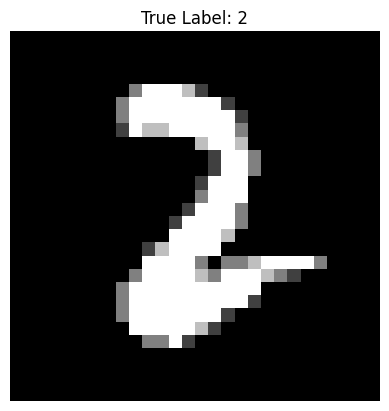

In [29]:
def show_random_prediction(X_test, y_test, W1, b1, W2, b2):
    # Select a random index
    random_index = np.random.randint(0, X_test.shape[0])
    
    # Extract the corresponding data
    random_image = X_test[random_index]
    true_label = y_test[random_index]
    
    # Reshape the image for display
    reshaped_image = random_image.reshape(28, 28)
    
    # Get the model's prediction
    prediction = predict(random_image.reshape(1, -1), W1, b1, W2, b2)
    predicted_label = prediction[0]
    
    # Display the prediction
    print(f"Model says: {predicted_label}")
    
    # Display the image
    plt.imshow(reshaped_image, cmap='gray')
    plt.title(f"True Label: {true_label}")
    plt.axis('off')
    plt.show()

show_random_prediction(X_test, y_test, W1, b1, W2, b2)
